In [83]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px

from collections import Counter

df_artistas = pd.read_csv("spotify_artists.csv")

df_albuns = pd.read_csv("spotify_albums.csv")

df_tracks = pd.read_csv("spotify_tracks.csv")



LIMPEZA ARTISTAS

In [84]:
print("Colunas de df_albuns:", df_albuns.columns)
print("Colunas de df_artistas:", df_artistas.columns)
print("Colunas de df_tracks:", df_tracks.columns)


Colunas de df_albuns: Index(['Unnamed: 0', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id', 'images', 'name', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id', 'track_name_prev',
       'uri', 'type'],
      dtype='object')
Colunas de df_artistas: Index(['Unnamed: 0', 'artist_popularity', 'followers', 'genres', 'id', 'name',
       'track_id', 'track_name_prev', 'type'],
      dtype='object')
Colunas de df_tracks: Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')


In [85]:

# Limpeza dos dados
if 'df_artistas' in locals():
    df_artistas.dropna(inplace=True)
    df_artistas = df_artistas[~((df_artistas['followers'] == 0) & (df_artistas['artist_popularity'] >= 10))]

# Verificação e correção de chaves duplicadas
if 'df_tracks' in locals():
    df_tracks.drop_duplicates(subset=['id'], inplace=True)
if 'df_albuns' in locals():
    df_albuns.drop_duplicates(subset=['id'], inplace=True)
if 'df_artistas' in locals():
    df_artistas.drop_duplicates(subset=['id'], inplace=True)

# Correção de merges
if 'df_albuns' in locals() and 'df_artistas' in locals():
    df_albuns_artistas = pd.merge(
        df_albuns, 
        df_artistas, 
        left_on='artist_id',  # df_albuns tem 'artist_id'
        right_on='id',        # df_artistas tem 'id' como identificador
        how='left', 
        suffixes=('_alb', '_art')
    )

if 'df_albuns_artistas' in locals() and 'df_tracks' in locals():
    df_final = pd.merge(
    df_albuns_artistas, 
    df_tracks, 
    left_on='id_alb',  # df_albuns_artistas tem 'id_alb'
    right_on='album_id',  # df_tracks tem 'album_id'
    how='left', 
    suffixes=('_alb', '_trk')
)

    
    # Calcular popularidade média por álbum e adicionar ao dataset
    album_popularity = df_final.groupby('album_id')['popularity'].mean().reset_index()
    album_popularity.rename(columns={'popularity': 'album_popularity'}, inplace=True)
    df_final = df_final.merge(album_popularity, on='album_id', how='left')


In [86]:
print("Colunas de df_albuns_artistas:", df_albuns_artistas.columns)
print("Amostra de df_albuns_artistas:\n", df_albuns_artistas.head())


Colunas de df_albuns_artistas: Index(['Unnamed: 0_alb', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id_alb', 'images', 'name_alb', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id_alb',
       'track_name_prev_alb', 'uri', 'type_alb', 'Unnamed: 0_art',
       'artist_popularity', 'followers', 'genres', 'id_art', 'name_art',
       'track_id_art', 'track_name_prev_art', 'type_art'],
      dtype='object')
Amostra de df_albuns_artistas:
    Unnamed: 0_alb album_type               artist_id  \
0               0     single  3DiDSECUqqY1AuBP8qtaIa   
1               1      album  6s1pCNXcbdtQJlsnM1hRIA   
2               2     single  5YjfNaHq05WrwldRe1QSBc   
3               3     single  2G9Vc16JCpnZmK4uGH46Fa   
4               4     single  2dwM9OcE4c3Ph1UBINSodx   

                                   available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH

In [87]:
print("Quantidade de faixas únicas:", df_final['id'].nunique())


Quantidade de faixas únicas: 101939


In [88]:
print("Colunas de df_albuns_artistas:", df_albuns_artistas.columns)
print("Amostra de df_albuns_artistas:\n", df_albuns_artistas[['id_alb']].head())


Colunas de df_albuns_artistas: Index(['Unnamed: 0_alb', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id_alb', 'images', 'name_alb', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id_alb',
       'track_name_prev_alb', 'uri', 'type_alb', 'Unnamed: 0_art',
       'artist_popularity', 'followers', 'genres', 'id_art', 'name_art',
       'track_id_art', 'track_name_prev_art', 'type_art'],
      dtype='object')
Amostra de df_albuns_artistas:
                    id_alb
0  1gAM7M4rBwEbSPeAQR2nx1
1  4KfJZV7WfolYlxBzOTo66s
2  7nLYY7uAVUb57kpd7tZxnS
3  6p20Rt4x2Qn5mUMRi1s6pj
4  1XeoOqC1q7U2iyLEQJ64cu


In [89]:
print("Colunas de df_tracks:", df_tracks.columns)
print("Amostra de df_tracks:\n", df_tracks[['album_id']].head())

# Verificar se há correspondência entre os identificadores
print("Valores de id_alb que não estão em df_tracks['album_id']:", 
      df_albuns_artistas[~df_albuns_artistas['id_alb'].isin(df_tracks['album_id'])].shape[0])


Colunas de df_tracks: Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')
Amostra de df_tracks:
                  album_id
0  0D3QufeCudpQANOR7luqdr
1  1bcqsH5UyTBzmh9YizdsBE
2  4tKijjmxGClg4JOLAyo2qE
3  6FeJF5r8roonnKraJxr4oB
4  4tKijjmxGClg4JOLAyo2qE
Valores de id_alb que não estão em df_tracks['album_id']: 8


In [90]:
print("Quantidade de faixas únicas:", df_final['id'].nunique())


Quantidade de faixas únicas: 101939


LIMPEZA DOS ARTISTAS

In [ ]:

# Carregar os dados
try:
    df_artistas = pd.read_csv("spotify_artists.csv")
    df_albuns = pd.read_csv("spotify_albums.csv")
    df_tracks = pd.read_csv("spotify_tracks.csv")
except FileNotFoundError:
    print("Arquivos CSV não encontrados. Certifique-se de que os dados estão disponíveis.")

# Limpeza dos dados
if 'df_artistas' in locals():
    df_artistas.dropna(inplace=True)
    df_artistas = df_artistas[~((df_artistas['followers'] == 0) & (df_artistas['artist_popularity'] >= 10))]

# Verificação e correção de chaves duplicadas
if 'df_tracks' in locals():
    df_tracks.drop_duplicates(subset=['id'], inplace=True)
if 'df_albuns' in locals():
    df_albuns.drop_duplicates(subset=['id'], inplace=True)
if 'df_artistas' in locals():
    df_artistas.drop_duplicates(subset=['id'], inplace=True)

# Correção de merges
if 'df_albuns' in locals() and 'df_artistas' in locals():
    df_albuns_artistas = pd.merge(
        df_albuns, 
        df_artistas, 
        left_on='artist_id',  # df_albuns tem 'artist_id'
        right_on='id',        # df_artistas tem 'id' como identificador
        how='left', 
        suffixes=('_alb', '_art')
    )

if 'df_albuns_artistas' in locals() and 'df_tracks' in locals():
    df_final = pd.merge(
        df_albuns_artistas, 
        df_tracks, 
        left_on='id_alb',  # df_albuns_artistas tem 'id_alb'
        right_on='album_id',  # df_tracks tem 'album_id'
        how='left', 
        suffixes=('_alb', '_trk')
    )
    
    # Calcular popularidade média por álbum e adicionar ao dataset
    album_popularity = df_final.groupby('album_id')['popularity'].mean().reset_index()
    album_popularity.rename(columns={'popularity': 'album_popularity'}, inplace=True)
    df_final = df_final.merge(album_popularity, on='album_id', how='left')

# Eliminação de Dados Duplicados
print("Duplicatas em df_final:", df_final.duplicated().sum())
print("Duplicatas em df_artistas:", df_artistas.duplicated().sum())
print("Duplicatas em df_albuns:", df_albuns.duplicated().sum())
print("Duplicatas em df_tracks:", df_tracks.duplicated().sum())

# Remover duplicatas
df_final.drop_duplicates(inplace=True)
df_artistas.drop_duplicates(subset=['id'], inplace=True)
df_albuns.drop_duplicates(subset=['id'], inplace=True)
df_tracks.drop_duplicates(subset=['id'], inplace=True)

# Verificar se as duplicatas foram removidas
print("Duplicatas após remoção - df_final:", df_final.duplicated().sum())
print("Duplicatas após remoção - df_artistas:", df_artistas.duplicated().sum())
print("Duplicatas após remoção - df_albuns:", df_albuns.duplicated().sum())
print("Duplicatas após remoção - df_tracks:", df_tracks.duplicated().sum())


In [92]:
# Verificar valores nulos em cada DataFrame
print("Valores nulos em df_final:\n", df_final.isnull().sum())
print("Valores nulos em df_artistas:\n", df_artistas.isnull().sum())
print("Valores nulos em df_albuns:\n", df_albuns.isnull().sum())
print("Valores nulos em df_tracks:\n", df_tracks.isnull().sum())

# Exibir estatísticas descritivas para identificar anomalias
print("\nEstatísticas do df_final:\n", df_final.describe())
print("\nEstatísticas do df_artistas:\n", df_artistas.describe())
print("\nEstatísticas do df_albuns:\n", df_albuns.describe())
print("\nEstatísticas do df_tracks:\n", df_tracks.describe())


Valores nulos em df_final:
 Unnamed: 0_alb              0
album_type                  0
artist_id                   0
available_markets_alb       0
external_urls               0
href_alb                    0
id_alb                      0
images                      0
name_alb                    0
release_date                0
release_date_precision      0
total_tracks                0
track_id_alb                0
track_name_prev_alb         0
uri_alb                     0
type_alb                    0
Unnamed: 0_art            807
artist_popularity         807
followers                 807
genres                    807
id_art                    807
name_art                  807
track_id_art              807
track_name_prev_art       807
type_art                  807
Unnamed: 0                  8
acousticness                8
album_id                    8
analysis_url                8
artists_id                  8
available_markets_trk       8
country                     8
danceability

In [93]:
# Preenchendo valores nulos de colunas numéricas com 0
df_final['artist_popularity'].fillna(0, inplace=True)
df_final['followers'].fillna(0, inplace=True)

# Preenchendo colunas categóricas com 'Desconhecido'
df_final['genres'].fillna('Desconhecido', inplace=True)
df_final['id_art'].fillna('Desconhecido', inplace=True)
df_final['name_art'].fillna('Desconhecido', inplace=True)
df_final['track_id_art'].fillna('Desconhecido', inplace=True)
df_final['track_name_prev_art'].fillna('Desconhecido', inplace=True)

# Verificar novamente valores nulos
print("Valores nulos após tratamento:\n", df_final.isnull().sum())


C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\2999800388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['artist_popularity'].fillna(0, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\2999800388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Valores nulos após tratamento:
 Unnamed: 0_alb              0
album_type                  0
artist_id                   0
available_markets_alb       0
external_urls               0
href_alb                    0
id_alb                      0
images                      0
name_alb                    0
release_date                0
release_date_precision      0
total_tracks                0
track_id_alb                0
track_name_prev_alb         0
uri_alb                     0
type_alb                    0
Unnamed: 0_art            807
artist_popularity           0
followers                   0
genres                      0
id_art                      0
name_art                    0
track_id_art                0
track_name_prev_art         0
type_art                  807
Unnamed: 0                  8
acousticness                8
album_id                    8
analysis_url                8
artists_id                  8
available_markets_trk       8
country                     8
danceabi

In [94]:
# Removendo colunas irrelevantes
df_final.drop(columns=['Unnamed: 0_art', 'type_art', 'Unnamed: 0'], inplace=True, errors='ignore')

# Preenchendo os últimos valores nulos com dados apropriados
df_final.fillna({
    'acousticness': df_final['acousticness'].median(),
    'danceability': df_final['danceability'].median(),
    'energy': df_final['energy'].median(),
    'instrumentalness': df_final['instrumentalness'].median(),
    'liveness': df_final['liveness'].median(),
    'loudness': df_final['loudness'].median(),
    'speechiness': df_final['speechiness'].median(),
    'tempo': df_final['tempo'].median(),
    'valence': df_final['valence'].median(),
    'popularity': df_final['popularity'].median(),
    'album_popularity': df_final['album_popularity'].median(),
    'name': 'Desconhecido',
    'playlist': 'Sem Playlist',
    'preview_url': 'Sem URL'
}, inplace=True)

# Verificar novamente valores nulos
print("Valores nulos após tratamento final:\n", df_final.isnull().sum())


Valores nulos após tratamento final:
 Unnamed: 0_alb            0
album_type                0
artist_id                 0
available_markets_alb     0
external_urls             0
href_alb                  0
id_alb                    0
images                    0
name_alb                  0
release_date              0
release_date_precision    0
total_tracks              0
track_id_alb              0
track_name_prev_alb       0
uri_alb                   0
type_alb                  0
artist_popularity         0
followers                 0
genres                    0
id_art                    0
name_art                  0
track_id_art              0
track_name_prev_art       0
acousticness              0
album_id                  8
analysis_url              8
artists_id                8
available_markets_trk     8
country                   8
danceability              0
disc_number               8
duration_ms               8
energy                    0
href_trk                  8
id        

In [95]:
# Remover linhas que ainda contêm valores nulos, pois são poucas (apenas 8 registros)
df_final.dropna(inplace=True)

# Verificar se os valores nulos foram completamente eliminados
print("Valores nulos após remoção final:\n", df_final.isnull().sum())


Valores nulos após remoção final:
 Unnamed: 0_alb            0
album_type                0
artist_id                 0
available_markets_alb     0
external_urls             0
href_alb                  0
id_alb                    0
images                    0
name_alb                  0
release_date              0
release_date_precision    0
total_tracks              0
track_id_alb              0
track_name_prev_alb       0
uri_alb                   0
type_alb                  0
artist_popularity         0
followers                 0
genres                    0
id_art                    0
name_art                  0
track_id_art              0
track_name_prev_art       0
acousticness              0
album_id                  0
analysis_url              0
artists_id                0
available_markets_trk     0
country                   0
danceability              0
disc_number               0
duration_ms               0
energy                    0
href_trk                  0
id           

In [96]:

df_artistas.head()

df_artistas.describe()

,Unnamed: 0,artist_popularity,followers
count,55922.000000,55922.000000,5.592200e+04
mean,28098.295358,34.450806,7.824897e+04
std,16200.333827,16.910654,5.953071e+05
min,0.000000,0.000000,0.000000e+00
25%,14075.250000,22.000000,1.870000e+02
50%,28116.500000,34.000000,1.764000e+03
75%,42126.750000,46.000000,1.533575e+04
max,56128.000000,100.000000,4.156169e+07


In [97]:
df_artistas[df_artistas.isnull().any(axis=1)]
df_artistas.dropna(inplace = True)
df_artistas.isnull().sum()


Unnamed: 0           0
artist_popularity    0
followers            0
genres               0
id                   0
name                 0
track_id             0
track_name_prev      0
type                 0
dtype: int64

In [98]:

artistas_deletados = df_artistas[(df_artistas['followers'] == 0) & (df_artistas['artist_popularity'] >= 10)].index
df_artistas.drop(artistas_deletados, inplace=True)
df_artistas.loc[df_artistas['followers'] == 0] 


df_artistas.drop_duplicates(inplace = True)
df_artistas.nunique()

df_artistas['followers'].describe()


def drop_outliers(base, variavel):
    outliers = []
    # Calcula Q1 (25º percentil) para a variável dada
    Q1 = np.percentile(base[variavel], 25)
    
    # Calcula Q3 (75º percentil) para a variável dada
    Q3 = np.percentile(base[variavel], 75)
    
    # Usa IQR (interquartile range) para calcular um passo de outlier
    IQR = Q3-Q1
    passo = 1.5 * IQR
    
    # Mostrando os outliers
    print("Pontos considerados outliers para a variável'{}':".format(variavel))
    display(base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))])
    
    feature_outliers = base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))]
    outliers.extend(list(feature_outliers.index.values))
    
    return outliers

outliers = drop_outliers(df_artistas, 'followers')
df_artistas = df_artistas.loc[~df_artistas.index.isin(outliers)].reset_index(drop=True)
df_artistas['followers'].describe()

Pontos considerados outliers para a variável'followers':


,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
11,11,53,373085,"['pagode', 'sertanejo', 'sertanejo pop', 'sert...",0ozdcqmICsOZDe7eJQVzrp,Rick & Renner,1x0nDKfYDed4qcRNWxOoZv,track_1,artist
22,22,52,250846,"['sertanejo', 'sertanejo tradicional', 'sertan...",7HUHsmvWREkN4l179tvpBe,Chrystian & Ralf,1d5kwhPv0q2GMTHQz9OEAZ,track_20,artist
33,33,53,39458,"['diva house', 'hip house', 'urban contemporar...",5UoVLCWzOKMIJ9iioof9OD,CeCe Peniston,4dwwiDqMNaBHeSrH3IHv62,track_36,artist
44,44,62,262503,"['blues', 'blues-rock', 'classic rock', 'folk'...",06nsZ3qSOYZ2hPVIMcr1IN,J.J. Cale,2pTK0kJECu2oA4rbIvU9Tw,track_4,artist
49,49,58,575707,"['pagode', 'sertanejo', 'sertanejo pop', 'sert...",6zpNfYJcPavd1pqLXKiSvl,Edson & Hudson,6c63XoLOW95ZK6J4vtDY2X,track_13,artist
...,...,...,...,...,...,...,...,...,...
56116,56116,80,7093119,"['dance pop', 'hip pop', 'pop', 'post-teen pop...",6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,0v3BMLcwUmAwyqJaf5997o,track_69,artist
56120,56120,83,1726953,"['dance pop', 'edm', 'pop', 'tropical house']",1HBjj22wzbscIZ9sEb5dyf,Jonas Blue,4M8x1TR36VMQMFMbGCdoyA,track_86,artist
56121,56121,70,50315,['pop house'],4EPJlUEBy49EX1wuFOvtjK,Becky Hill,4M8x1TR36VMQMFMbGCdoyA,track_87,artist
56125,56125,42,57973,"['aggro chileno', 'andean', 'chilean rock', 'l...",1OgaghfYd1qr8DFoNrfDNk,Sinergia,0rXhmIYRPIoVYstJdZt4uq,track_21,artist


count    46795.000000
mean      4567.819062
std       7792.246763
min          0.000000
25%        123.000000
50%        884.000000
75%       4956.000000
max      38055.000000
Name: followers, dtype: float64

In [99]:


# Padronização de nomes de álbuns e artistas
df_final['name_alb'] = df_final['name_alb'].str.strip().str.lower()
df_final['name_art'] = df_final['name_art'].str.strip().str.lower()

# Substituir valores nulos em colunas críticas
df_final['genres'].fillna('desconhecido', inplace=True)
df_final['id_art'].fillna('desconhecido', inplace=True)
df_final['name_art'].fillna('desconhecido', inplace=True)

# Verificar registros sem ID válido
df_invalidos = df_final[df_final['id_alb'].isna() | df_final['id_art'].isna()]
print(f"Registros inválidos encontrados: {len(df_invalidos)}")

# Remover registros corrompidos
df_final = df_final.dropna(subset=['id_alb', 'id_art'])

# Criar lista única de gêneros disponíveis
generos_unicos = df_final['genres'].str.split(',').explode().str.strip().unique()
print("Gêneros únicos encontrados:", generos_unicos)

# Verificar se cada álbum tem um artista válido
albuns_invalidos = df_final[df_final['artist_id'].isna()]
print(f"Álbuns sem artista associado: {len(albuns_invalidos)}")

# Remover álbuns sem artista associado
df_final = df_final.dropna(subset=['artist_id'])

# Exibir amostra após o refinamento
print("Amostra dos dados refinados:")
display(df_final.head())


C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\2993486419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['genres'].fillna('desconhecido', inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\2993486419.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Registros inválidos encontrados: 0
Gêneros únicos encontrados: ["['hip pop'" "'neo soul'" "'pop'" ... "'portuguese indie']" "['salsa']"
 "'new orleans indie']"]
Álbuns sem artista associado: 0
Amostra dos dados refinados:


,Unnamed: 0_alb,album_type,artist_id,available_markets_alb,external_urls,href_alb,id_alb,images,name_alb,release_date,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri_trk,valence,type,album_popularity
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",if i ain't got you ep,2019-02-08,...,0.1090,118.539,3.0,https://api.spotify.com/v1/tracks/2iejTMy9XZ8G...,track_32,2.0,spotify:track:2iejTMy9XZ8Gaae0aQ2yl0,0.197,track,41.0
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",shostakovich symphony no.5 - four romances on ...,2019-03-01,...,0.0522,133.458,3.0,https://api.spotify.com/v1/tracks/1WQfghEjszJJ...,track_11,2.0,spotify:track:1WQfghEjszJJ4H8MAWrQ2C,0.413,track,37.0
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",take my bass,2019-03-14,...,0.0669,126.060,4.0,https://api.spotify.com/v1/tracks/3jJKj4QTK3v1...,track_15,1.0,spotify:track:3jJKj4QTK3v18ZSwpk7AcV,0.448,track,4.0
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",hypnotizing (are u),2016-11-16,...,0.0840,159.992,4.0,https://api.spotify.com/v1/tracks/1xGtDafUZbHy...,track_46,1.0,spotify:track:1xGtDafUZbHyYC3Xarcbrj,0.429,track,27.0
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",sunshine,2018-07-20,...,0.0592,89.655,4.0,https://api.spotify.com/v1/tracks/0gWtsXvXOzAT...,track_10,1.0,spotify:track:0gWtsXvXOzAT6FtM3ur8in,0.505,track,30.0


In [100]:

# Padronização de nomes de álbuns e artistas
df_final['name_alb'] = df_final['name_alb'].str.strip().str.lower()
df_final['name_art'] = df_final['name_art'].str.strip().str.lower()

# Substituir valores nulos em colunas críticas de forma segura
df_final = df_final.assign(
    genres=df_final['genres'].fillna('desconhecido'),
    id_art=df_final['id_art'].fillna('desconhecido'),
    name_art=df_final['name_art'].fillna('desconhecido')
)

# Extração correta dos gêneros únicos
df_final['genres'] = df_final['genres'].astype(str).str.replace(r"[\[\]']", '', regex=True)
generos_unicos = df_final['genres'].str.split(',').explode().str.strip().unique()
print("Gêneros únicos encontrados:", generos_unicos)

# Exibir amostra após refinamento
print("Amostra dos dados refinados:")
display(df_final.head())


Gêneros únicos encontrados: ['hip pop' 'neo soul' 'pop' ... 'fijian pop' 'classical guitar duo'
 'deep indie singer-songwriter']
Amostra dos dados refinados:


,Unnamed: 0_alb,album_type,artist_id,available_markets_alb,external_urls,href_alb,id_alb,images,name_alb,release_date,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri_trk,valence,type,album_popularity
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",if i ain't got you ep,2019-02-08,...,0.1090,118.539,3.0,https://api.spotify.com/v1/tracks/2iejTMy9XZ8G...,track_32,2.0,spotify:track:2iejTMy9XZ8Gaae0aQ2yl0,0.197,track,41.0
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",shostakovich symphony no.5 - four romances on ...,2019-03-01,...,0.0522,133.458,3.0,https://api.spotify.com/v1/tracks/1WQfghEjszJJ...,track_11,2.0,spotify:track:1WQfghEjszJJ4H8MAWrQ2C,0.413,track,37.0
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",take my bass,2019-03-14,...,0.0669,126.060,4.0,https://api.spotify.com/v1/tracks/3jJKj4QTK3v1...,track_15,1.0,spotify:track:3jJKj4QTK3v18ZSwpk7AcV,0.448,track,4.0
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",hypnotizing (are u),2016-11-16,...,0.0840,159.992,4.0,https://api.spotify.com/v1/tracks/1xGtDafUZbHy...,track_46,1.0,spotify:track:1xGtDafUZbHyYC3Xarcbrj,0.429,track,27.0
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",sunshine,2018-07-20,...,0.0592,89.655,4.0,https://api.spotify.com/v1/tracks/0gWtsXvXOzAT...,track_10,1.0,spotify:track:0gWtsXvXOzAT6FtM3ur8in,0.505,track,30.0


análise e tratamento de outliers


Outliers detectados em followers: 12455 registros
Outliers detectados em artist_popularity: 0 registros
Outliers detectados em album_popularity: 67 registros


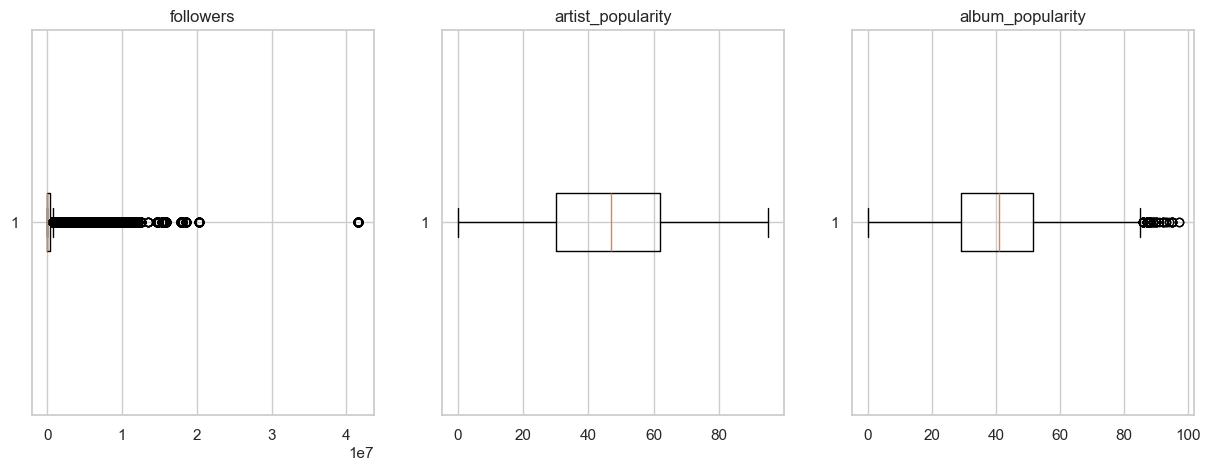

Outliers removidos! Estatísticas após tratamento:
           followers  artist_popularity  album_popularity
count   89446.000000       89446.000000      89446.000000
mean   106285.465376          40.766664         37.470373
std    173008.034923          19.928417         15.605832
min         0.000000           0.000000          0.000000
25%      1692.000000          28.000000         27.000000
50%     16426.500000          44.000000         38.666667
75%    122734.000000          56.000000         49.000000
max    781746.000000          87.000000         82.000000


In [101]:


# Função para detectar outliers usando IQR
def detectar_outliers(df, coluna):
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Analisar outliers nas métricas críticas
colunas_para_analisar = ['followers', 'artist_popularity', 'album_popularity']

for coluna in colunas_para_analisar:
    outliers_detectados = detectar_outliers(df_final, coluna)
    print(f"Outliers detectados em {coluna}: {len(outliers_detectados)} registros")

# Visualizar a distribuição antes de remover outliers
plt.figure(figsize=(15,5))
for i, coluna in enumerate(colunas_para_analisar):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df_final[coluna], vert=False)
    plt.title(coluna)
plt.show()

# Remover outliers
for coluna in colunas_para_analisar:
    Q1 = np.percentile(df_final[coluna], 25)
    Q3 = np.percentile(df_final[coluna], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_final = df_final[(df_final[coluna] >= limite_inferior) & (df_final[coluna] <= limite_superior)]

print("Outliers removidos! Estatísticas após tratamento:")
print(df_final[colunas_para_analisar].describe())



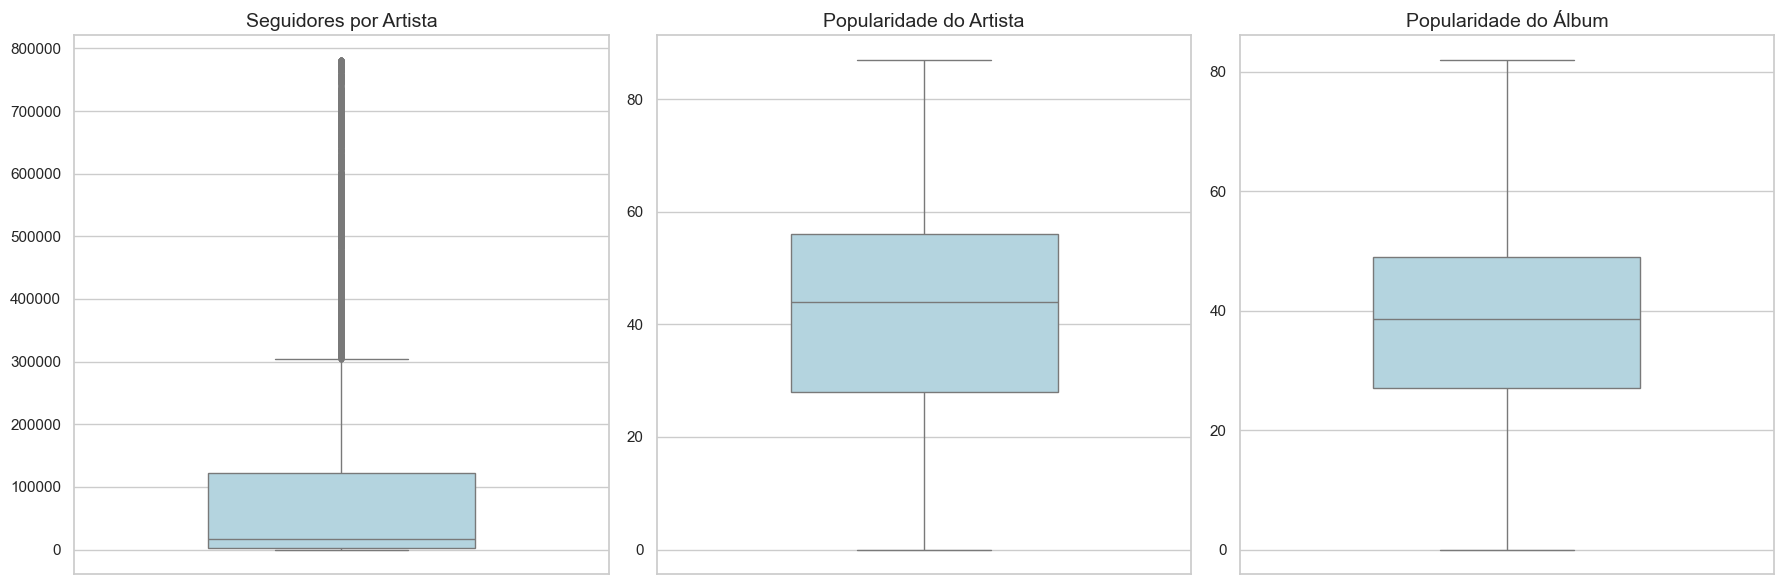

In [102]:


# Configuração do estilo do gráfico
sns.set(style="whitegrid")

# Criar figura e eixos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Listar colunas para visualização
cols = ['followers', 'artist_popularity', 'album_popularity']
titles = ['Seguidores por Artista', 'Popularidade do Artista', 'Popularidade do Álbum']

# Criar boxplots melhorados
for i, col in enumerate(cols):
    sns.boxplot(y=df_final[col], ax=axes[i], color="lightblue", width=0.5, fliersize=3)
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

# Ajustar layout
plt.tight_layout()
plt.show()


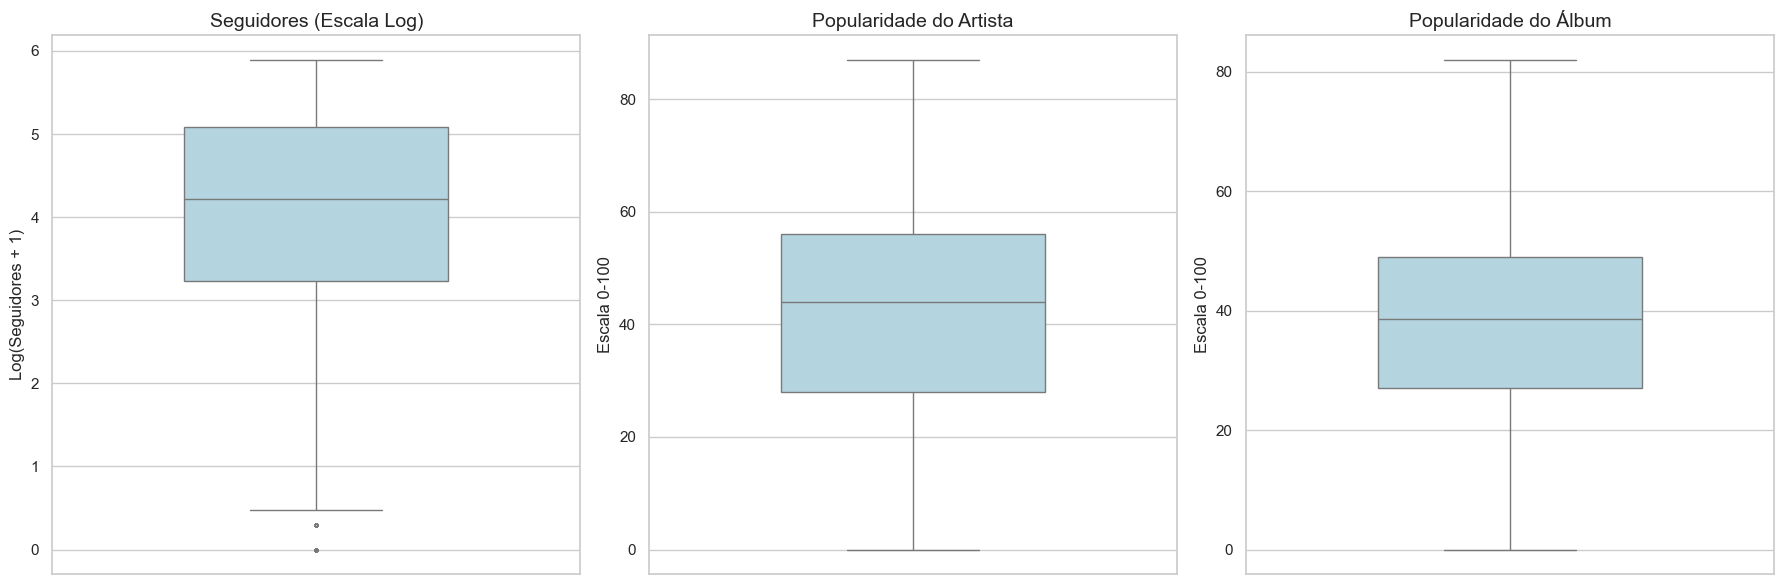

In [103]:


# Configurar o estilo
sns.set(style="whitegrid")

# Criar figura e eixos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dados para visualização
cols = ['followers', 'artist_popularity', 'album_popularity']
titles = ['Seguidores (Escala Log)', 'Popularidade do Artista', 'Popularidade do Álbum']

# Aplicar escala logarítmica ao número de seguidores para melhorar a legibilidade
df_final['followers_log'] = np.log10(df_final['followers'] + 1)

# Criar boxplots
for i, col in enumerate(cols):
    if col == 'followers':
        sns.boxplot(y=df_final['followers_log'], ax=axes[i], color="lightblue", width=0.5, fliersize=2)
        axes[i].set_ylabel("Log(Seguidores + 1)")
    else:
        sns.boxplot(y=df_final[col], ax=axes[i], color="lightblue", width=0.5, fliersize=2)
        axes[i].set_ylabel("Escala 0-100")

    axes[i].set_title(titles[i], fontsize=14)

# Ajustar layout
plt.tight_layout()
plt.show()


In [104]:


# Verificar amostra dos gêneros
print("Amostra antes da limpeza:", df_final['genres'].head())

# Remover caracteres indesejados e dividir corretamente os gêneros
df_final['genres'] = df_final['genres'].astype(str).str.replace(r"[\[\]']", '', regex=True)
df_final['genres'] = df_final['genres'].str.split(',')

# Explodir a coluna para ter um gênero por linha
df_generos = df_final.explode('genres')

# Remover espaços em branco extras
df_generos['genres'] = df_generos['genres'].str.strip()

# Substituir valores vazios ou inválidos por 'Desconhecido'
df_generos['genres'] = df_generos['genres'].replace('', 'Desconhecido')
df_generos['genres'] = df_generos['genres'].fillna('Desconhecido')


# Verificar os gêneros únicos após a limpeza
generos_unicos = df_generos['genres'].unique()
print("Gêneros únicos encontrados:", generos_unicos[:20])  # Mostrar apenas os 20 primeiros

# Exibir amostra dos dados refinados
print("Amostra dos dados refinados:")
display(df_generos.head())


Amostra antes da limpeza: 1    classical, compositional ambient, russian mode...
2                                                     
3                                                     
4                                                     
5    avant-garde, brazilian composition, classical,...
Name: genres, dtype: object
Gêneros únicos encontrados: ['classical' 'compositional ambient' 'russian modern classical'
 'Desconhecido' 'avant-garde' 'brazilian composition'
 'early modern classical' 'british choir' 'choral' 'classical performance'
 'early music' 'early music choir' 'early music ensemble' 'monastic'
 'polyphony' 'australian garage punk' 'australian psych' 'neo-psychedelic'
 'musica llanera' 'classic finnish pop']
Amostra dos dados refinados:


,Unnamed: 0_alb,album_type,artist_id,available_markets_alb,external_urls,href_alb,id_alb,images,name_alb,release_date,...,tempo,time_signature,track_href,track_name_prev,track_number,uri_trk,valence,type,album_popularity,followers_log
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",shostakovich symphony no.5 - four romances on ...,2019-03-01,...,133.458,3.0,https://api.spotify.com/v1/tracks/1WQfghEjszJJ...,track_11,2.0,spotify:track:1WQfghEjszJJ4H8MAWrQ2C,0.413,track,37.0,5.133002
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",shostakovich symphony no.5 - four romances on ...,2019-03-01,...,133.458,3.0,https://api.spotify.com/v1/tracks/1WQfghEjszJJ...,track_11,2.0,spotify:track:1WQfghEjszJJ4H8MAWrQ2C,0.413,track,37.0,5.133002
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",shostakovich symphony no.5 - four romances on ...,2019-03-01,...,133.458,3.0,https://api.spotify.com/v1/tracks/1WQfghEjszJJ...,track_11,2.0,spotify:track:1WQfghEjszJJ4H8MAWrQ2C,0.413,track,37.0,5.133002
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",take my bass,2019-03-14,...,126.060,4.0,https://api.spotify.com/v1/tracks/3jJKj4QTK3v1...,track_15,1.0,spotify:track:3jJKj4QTK3v18ZSwpk7AcV,0.448,track,4.0,2.075547
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",hypnotizing (are u),2016-11-16,...,159.992,4.0,https://api.spotify.com/v1/tracks/1xGtDafUZbHy...,track_46,1.0,spotify:track:1xGtDafUZbHyYC3Xarcbrj,0.429,track,27.0,2.491362


In [105]:
print("Colunas do df_final:", df_final.columns)


Colunas do df_final: Index(['Unnamed: 0_alb', 'album_type', 'artist_id', 'available_markets_alb',
       'external_urls', 'href_alb', 'id_alb', 'images', 'name_alb',
       'release_date', 'release_date_precision', 'total_tracks',
       'track_id_alb', 'track_name_prev_alb', 'uri_alb', 'type_alb',
       'artist_popularity', 'followers', 'genres', 'id_art', 'name_art',
       'track_id_art', 'track_name_prev_art', 'acousticness', 'album_id',
       'analysis_url', 'artists_id', 'available_markets_trk', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy', 'href_trk',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'lyrics',
       'mode', 'name', 'playlist', 'popularity', 'preview_url', 'speechiness',
       'tempo', 'time_signature', 'track_href', 'track_name_prev',
       'track_number', 'uri_trk', 'valence', 'type', 'album_popularity',
       'followers_log'],
      dtype='object')


popularidade por país

In [106]:
print("Valores nulos em 'country':", df_final['country'].isnull().sum())


Valores nulos em 'country': 0


In [107]:
df_final = df_final.explode('genres')  # Transforma listas em linhas individuais
df_generos_pais = df_final.groupby(['country', 'genres']).size().reset_index(name='quantidade')


In [108]:
df_generos_pais = df_final.groupby(['country', 'genres']).size().reset_index(name='quantidade')


In [109]:
display(df_generos_pais.head(10))  # Exibir as 10 primeiras linhas


,country,genres,quantidade
0,AR,,10401
1,AR,"""childrens folk""",4
2,AR,"""childrens music""",7
3,AR,acid house,3
4,AR,acid techno,1
5,AR,afrikaans,7
6,AR,afro house,2
7,AR,afrobeat,7
8,AR,afropop,197
9,AR,albanian pop,2


In [110]:
print("Países únicos:", df_generos_pais['country'].nunique())
print("Gêneros únicos:", df_generos_pais['genres'].nunique())
print(df_generos_pais.info())  # Estrutura do DataFrame


Países únicos: 3
Gêneros únicos: 3964
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9189 entries, 0 to 9188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     9189 non-null   object
 1   genres      9189 non-null   object
 2   quantidade  9189 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 215.5+ KB
None


In [111]:
df_generos_pais.sort_values(by='quantidade', ascending=False, inplace=True)
display(df_generos_pais.head(10))  # Top 10 combinações país-gênero


,country,genres,quantidade
0,AR,,10401
6115,FI,,7011
3385,BE,,4794
553,AR,folk-pop,974
1209,AR,pop,914
1613,AR,tropical house,828
738,AR,indie folk,820
471,AR,edm,726
1024,AR,modern rock,684
1337,AR,rock,657


In [112]:
print("Valores nulos em 'country':", df_generos_pais['country'].isnull().sum())
print("Valores nulos em 'genres':", df_generos_pais['genres'].isnull().sum())


Valores nulos em 'country': 0
Valores nulos em 'genres': 0


In [113]:
print("Países únicos:", df_generos_pais['country'].unique())


Países únicos: ['AR' 'FI' 'BE']


In [114]:
top_generos = df_generos_pais.groupby('genres')['quantidade'].sum().sort_values(ascending=False).head(5)
display(top_generos)


genres
               22206
 folk-pop       1757
 pop            1477
hoerspiel       1468
 indie folk     1458
Name: quantidade, dtype: int64

LIMPEZA ALBUNS

In [115]:
df_albuns.head()

,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [116]:
df_albuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

In [117]:
df_albuns[df_albuns.isnull().any(axis=1)]
df_albuns.dropna(inplace = True)
df_albuns = df_albuns.drop_duplicates()
df_albuns.isnull().sum()



Unnamed: 0                0
album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

In [118]:
df_albuns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

In [119]:
df_albuns.head()

,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [120]:
df_albuns['release_date'] = pd.to_datetime(df_albuns['release_date'], errors='coerce')



LIMPEZA TRACKS

In [121]:
df_tracks.head()    

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [122]:
print(df_tracks.columns)


Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')


In [123]:

print(df_tracks.head())
print(df_tracks.info())
print(df_tracks.isnull().sum())

duplicatas = df_tracks.duplicated()
print("Número total de linhas duplicadas:", duplicatas.sum())

duplicatas_album = df_tracks.duplicated(subset='album_id')
print("Número de álbuns duplicados:", duplicatas_album.sum())

df_tracks_albuns = df_tracks.groupby('album_id').agg({
    'popularity': 'mean',   
    'danceability': 'mean', 
    'energy': 'mean',       
    'valence': 'mean',         
    'tempo': 'mean',           
    'duration_ms': 'sum',      
    'id': 'count'
}).reset_index()

df_tracks_albuns.rename(columns={'id': 'num_tracks'}, inplace=True)

df_tracks_albuns = df_tracks_albuns.merge(
    df_tracks[['album_id', 'artists_id']].drop_duplicates(subset='album_id'),
    on='album_id',
    how='left'
)

print(df_tracks_albuns.head())

df_tracks_sorted = df_tracks_albuns.sort_values(by='popularity', ascending=False)
print(df_tracks_sorted.head(10))


   Unnamed: 0  acousticness                album_id  \
0           0         0.294  0D3QufeCudpQANOR7luqdr   
1           1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2           2         0.750  4tKijjmxGClg4JOLAyo2qE   
3           3         0.763  6FeJF5r8roonnKraJxr4oB   
4           4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

MERGE

In [124]:
print("Colunas de df_albums:")
print(df_albuns.columns)

print("\nColunas de df_artists:")
print(df_artistas.columns)


Colunas de df_albums:
Index(['Unnamed: 0', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id', 'images', 'name', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id', 'track_name_prev',
       'uri', 'type'],
      dtype='object')

Colunas de df_artists:
Index(['Unnamed: 0', 'artist_popularity', 'followers', 'genres', 'id', 'name',
       'track_id', 'track_name_prev', 'type'],
      dtype='object')


In [125]:
df_albuns.rename(columns={'name': 'album_name'}, inplace=True)

df_artistas.rename(columns={
    'id': 'artist_id',
    'name': 'artist_name'
}, inplace=True)


In [126]:
print(df_albuns.isnull().sum())
print(df_artistas.isnull().sum())


Unnamed: 0                   0
album_type                   0
artist_id                    0
available_markets            0
external_urls                0
href                         0
id                           0
images                       0
album_name                   0
release_date              5891
release_date_precision       0
total_tracks                 0
track_id                     0
track_name_prev              0
uri                          0
type                         0
dtype: int64
Unnamed: 0           0
artist_popularity    0
followers            0
genres               0
artist_id            0
artist_name          0
track_id             0
track_name_prev      0
type                 0
dtype: int64


In [127]:
df_merged = pd.merge(
    left=df_albuns,
    right=df_artistas,
    on='artist_id',
    how='left'
)

print(df_merged.head())
print(df_merged.columns)


   Unnamed: 0_x album_type               artist_id  \
0             0     single  3DiDSECUqqY1AuBP8qtaIa   
1             1      album  6s1pCNXcbdtQJlsnM1hRIA   
2             2     single  5YjfNaHq05WrwldRe1QSBc   
3             3     single  2G9Vc16JCpnZmK4uGH46Fa   
4             4     single  2dwM9OcE4c3Ph1UBINSodx   

                                   available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
2  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
4  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/album/1g...   
1  {'spotify': 'https://open.spotify.com/album/4K...   
2  {'spotify': 'https://open.spotify.com/album/7n...   
3  {'spotify': 'https://open.spotify.com/album/6p...   
4  {'spotify': 'https://open.spotify.com/album/1X...   

 

In [128]:
df_merged = pd.merge(
    df_albuns, 
    df_artistas, 
    on='artist_id', 
    how='left',
    suffixes=('_albums', '_artists')
)

print(df_albuns.columns)
print(df_artistas.columns)


Index(['Unnamed: 0', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id', 'images', 'album_name', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id', 'track_name_prev',
       'uri', 'type'],
      dtype='object')
Index(['Unnamed: 0', 'artist_popularity', 'followers', 'genres', 'artist_id',
       'artist_name', 'track_id', 'track_name_prev', 'type'],
      dtype='object')


In [129]:
df_albuns.rename(columns={'track_id': 'track_id_alb'}, inplace=True)

df_merged = pd.merge(
    df_albuns,
    df_artistas,
    left_on='artist_id',
    right_on='artist_id',
    how='left',
    suffixes=('_alb', '_art')
)


In [130]:
df_merged.head()
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0_alb          75511 non-null  int64         
 1   album_type              75511 non-null  object        
 2   artist_id               75511 non-null  object        
 3   available_markets       75511 non-null  object        
 4   external_urls           75511 non-null  object        
 5   href                    75511 non-null  object        
 6   id                      75511 non-null  object        
 7   images                  75511 non-null  object        
 8   album_name              75511 non-null  object        
 9   release_date            69620 non-null  datetime64[ns]
 10  release_date_precision  75511 non-null  object        
 11  total_tracks            75511 non-null  int64         
 12  track_id_alb            75511 non-null  object

In [131]:


print("df_albums columns:", df_albuns.columns)
print("df_artists columns:", df_artistas.columns)
print("df_tracks columns:", df_tracks.columns)


df_albums columns: Index(['Unnamed: 0', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id', 'images', 'album_name', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id_alb',
       'track_name_prev', 'uri', 'type'],
      dtype='object')
df_artists columns: Index(['Unnamed: 0', 'artist_popularity', 'followers', 'genres', 'artist_id',
       'artist_name', 'track_id', 'track_name_prev', 'type'],
      dtype='object')
df_tracks columns: Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')


In [132]:
df_tracks.rename(columns={'id': 'track_id'}, inplace=True)

df_artistas.rename(columns={'id': 'artist_id'}, inplace=True)

df_albuns_artistas = pd.merge(
    df_albuns,
    df_artistas,
    on='artist_id',      
    how='left',         
    suffixes=('_alb', '_art')  
)

df_final = pd.merge(
    df_albuns_artistas,
    df_tracks,
    on='track_id',       
    how='left',          
    suffixes=('_prev', '_tck')  
)


In [133]:
df_final.info()
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0_alb          75511 non-null  int64         
 1   album_type              75511 non-null  object        
 2   artist_id               75511 non-null  object        
 3   available_markets_prev  75511 non-null  object        
 4   external_urls           75511 non-null  object        
 5   href_prev               75511 non-null  object        
 6   id                      75511 non-null  object        
 7   images                  75511 non-null  object        
 8   album_name              75511 non-null  object        
 9   release_date            69620 non-null  datetime64[ns]
 10  release_date_precision  75511 non-null  object        
 11  total_tracks            75511 non-null  int64         
 12  track_id_alb            75511 non-null  object

,Unnamed: 0_alb,album_type,artist_id,available_markets_prev,external_urls,href_prev,id,images,album_name,release_date,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri_tck,valence,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,...,https://p.scdn.co/mp3-preview/e2a872994fa74cc1...,0.0669,126.060,4.0,https://api.spotify.com/v1/tracks/3jJKj4QTK3v1...,track_15,1.0,spotify:track:3jJKj4QTK3v18ZSwpk7AcV,0.448,track
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,...,https://p.scdn.co/mp3-preview/2dac13dea0241d4a...,0.0659,150.030,4.0,https://api.spotify.com/v1/tracks/3ZG6R1GRStUf...,track_4,1.0,spotify:track:3ZG6R1GRStUf7bVZTWX9cr,0.329,track
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,...,https://p.scdn.co/mp3-preview/9209ad2336264f48...,0.1000,160.136,4.0,https://api.spotify.com/v1/tracks/5nQEjj7cmgzu...,track_35,1.0,spotify:track:5nQEjj7cmgzuHc3zHxWWW1,0.842,track


In [134]:
df_final.columns


Index(['Unnamed: 0_alb', 'album_type', 'artist_id', 'available_markets_prev',
       'external_urls', 'href_prev', 'id', 'images', 'album_name',
       'release_date', 'release_date_precision', 'total_tracks',
       'track_id_alb', 'track_name_prev_alb', 'uri_prev', 'type_alb',
       'Unnamed: 0_art', 'artist_popularity', 'followers', 'genres',
       'artist_name', 'track_id', 'track_name_prev_art', 'type_art',
       'Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets_tck', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href_tck', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri_tck', 'valence',
       'type'],
      dtype='object')

In [135]:
df_final.drop(['external_urls', 'images', 'Unnamed: 0', 'href_prev', 'href_tck', 
               'track_href', 'uri_prev', 'uri_tck', 'analysis_url', 'track_name_prev_art', 
               'Unnamed: 0_art', 'Unnamed: 0_alb', 'release_date_precision', 'type_alb', 
               'type_art', 'type', 'track_name_prev_alb', 'track_name_prev', 'preview_url', 
               'lyrics'],  
              axis=1, inplace=True, errors='ignore')  

df_final.columns


Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence'],
      dtype='object')

In [136]:

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   album_type              75511 non-null  object        
 1   artist_id               75511 non-null  object        
 2   available_markets_prev  75511 non-null  object        
 3   id                      75511 non-null  object        
 4   album_name              75511 non-null  object        
 5   release_date            69620 non-null  datetime64[ns]
 6   total_tracks            75511 non-null  int64         
 7   track_id_alb            75511 non-null  object        
 8   artist_popularity       43732 non-null  float64       
 9   followers               43732 non-null  float64       
 10  genres                  43732 non-null  object        
 11  artist_name             43732 non-null  object        
 12  track_id                43732 non-null  object

In [137]:
df_final.head()

,album_type,artist_id,available_markets_prev,id,album_name,release_date,total_tracks,track_id_alb,artist_popularity,followers,...,loudness,mode,name,playlist,popularity,speechiness,tempo,time_signature,track_number,valence
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,6,2iejTMy9XZ8Gaae0aQ2yl0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,8,1WQfghEjszJJ4H8MAWrQ2C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7nLYY7uAVUb57kpd7tZxnS,Take My Bass,2019-03-14,1,3jJKj4QTK3v18ZSwpk7AcV,18.0,118.0,...,-5.934,1.0,Take My Bass,Bangers,4.0,0.0669,126.060,4.0,1.0,0.448
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),2016-11-16,1,1xGtDafUZbHyYC3Xarcbrj,24.0,309.0,...,-5.169,1.0,BNO,Hård træning,28.0,0.0659,150.030,4.0,1.0,0.329
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1XeoOqC1q7U2iyLEQJ64cu,Sunshine,2018-07-20,1,0gWtsXvXOzAT6FtM3ur8in,24.0,1394.0,...,-9.581,0.0,Mi Candelita,Entre los Andes,30.0,0.1000,160.136,4.0,1.0,0.842


In [138]:
print(df_final.head())
print(df_final.columns)


  album_type               artist_id  \
0     single  3DiDSECUqqY1AuBP8qtaIa   
1      album  6s1pCNXcbdtQJlsnM1hRIA   
2     single  5YjfNaHq05WrwldRe1QSBc   
3     single  2G9Vc16JCpnZmK4uGH46Fa   
4     single  2dwM9OcE4c3Ph1UBINSodx   

                              available_markets_prev                      id  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...  1gAM7M4rBwEbSPeAQR2nx1   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...  4KfJZV7WfolYlxBzOTo66s   
2  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...  7nLYY7uAVUb57kpd7tZxnS   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...  6p20Rt4x2Qn5mUMRi1s6pj   
4  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...  1XeoOqC1q7U2iyLEQJ64cu   

                                          album_name release_date  \
0                              If I Ain't Got You EP   2019-02-08   
1  Shostakovich Symphony No.5 - Four Romances on ...   2019-03-01   
2                                       Take My Bass   2019-03-14   
3 

In [139]:
print(df_final.columns)


Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence'],
      dtype='object')


In [140]:
df_final.rename(columns={'albuns_popularity_x': 'albuns_popularity', 'albuns_popularity_y': 'albuns_popularity'}, inplace=True)


In [141]:
# Calcular a média da popularidade das músicas dentro de cada álbum
album_popularity = df_final.groupby('album_id')['popularity'].mean().reset_index()

# Renomear a coluna para evitar confusão
album_popularity.rename(columns={'popularity': 'albuns_popularity'}, inplace=True)

# Mesclar essa informação de volta ao DataFrame principal
df_final = df_final.merge(album_popularity, on='album_id', how='left')


df_final['albuns_popularity'] = df_final['albuns_popularity']




df_final.head()

,album_type,artist_id,available_markets_prev,id,album_name,release_date,total_tracks,track_id_alb,artist_popularity,followers,...,mode,name,playlist,popularity,speechiness,tempo,time_signature,track_number,valence,albuns_popularity
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,6,2iejTMy9XZ8Gaae0aQ2yl0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,8,1WQfghEjszJJ4H8MAWrQ2C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7nLYY7uAVUb57kpd7tZxnS,Take My Bass,2019-03-14,1,3jJKj4QTK3v18ZSwpk7AcV,18.0,118.0,...,1.0,Take My Bass,Bangers,4.0,0.0669,126.060,4.0,1.0,0.448,4.0
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),2016-11-16,1,1xGtDafUZbHyYC3Xarcbrj,24.0,309.0,...,1.0,BNO,Hård træning,28.0,0.0659,150.030,4.0,1.0,0.329,28.0
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1XeoOqC1q7U2iyLEQJ64cu,Sunshine,2018-07-20,1,0gWtsXvXOzAT6FtM3ur8in,24.0,1394.0,...,0.0,Mi Candelita,Entre los Andes,30.0,0.1000,160.136,4.0,1.0,0.842,30.0


In [142]:
df_final['albuns_popularity'].fillna(0, inplace=True)


C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\2000445724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['albuns_popularity'].fillna(0, inplace=True)


In [143]:
print(df_final[['album_id', 'albuns_popularity']].head(10))
print(df_final.isnull().sum())  


                 album_id  albuns_popularity
0                     NaN                0.0
1                     NaN                0.0
2  7nLYY7uAVUb57kpd7tZxnS                4.0
3  6Cfu0A13qYupcA0IwLdInO               28.0
4  1ZMjGoj31n0kKTz04LjwoL               30.0
5  055sjDGyhszcb6K9PMM4jE               22.0
6  5xArvdiKZGe93wTEFS3Odv               19.0
7  5mwUwmTB5dvONIX8UxMimr               16.0
8                     NaN                0.0
9  5fIF3tHaRyl7NM3QDMRP31               13.0
album_type                    0
artist_id                     0
available_markets_prev        0
id                            0
album_name                    0
release_date               5891
total_tracks                  0
track_id_alb                  0
artist_popularity         31779
followers                 31779
genres                    31779
artist_name               31779
track_id                  31779
acousticness              31787
album_id                  31787
artists_id               

Análise descritiva e visualização

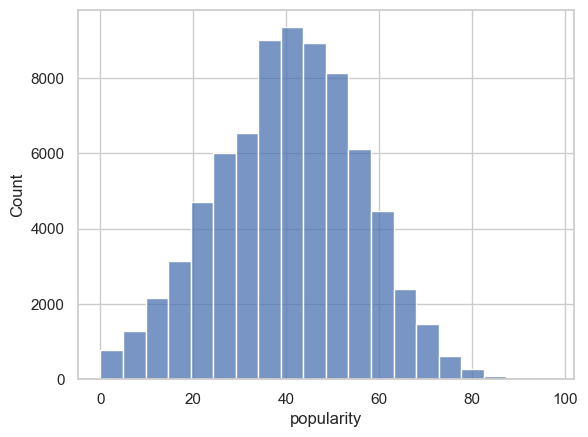

In [144]:
sns.histplot(data=df_tracks_albuns, x='popularity', bins=20)
plt.show()


Lista

In [145]:

df_albuns_sorted = df_final.sort_values(by='popularity', ascending=False)


colunas_de_interesse = ['album_id', 'popularity', 'total_tracks', 'artists_id']
df_albuns_rank = df_albuns_sorted[colunas_de_interesse]


top_10_albuns = df_albuns_rank.head(10)
print(top_10_albuns)


                     album_id  popularity  total_tracks  \
55318  429B3se6xtZuvblNnS2iy7        87.0             1   
55564  429B3se6xtZuvblNnS2iy7        87.0             1   
55024  4OyP4eAtpTHXjpVBjJvPNG        87.0             6   
70243  429B3se6xtZuvblNnS2iy7        87.0             1   
49696  429B3se6xtZuvblNnS2iy7        87.0             1   
73466  429B3se6xtZuvblNnS2iy7        87.0             1   
73235  4OyP4eAtpTHXjpVBjJvPNG        87.0             1   
73492  429B3se6xtZuvblNnS2iy7        87.0             1   
71051  429B3se6xtZuvblNnS2iy7        87.0             1   
33313  4OyP4eAtpTHXjpVBjJvPNG        87.0             1   

                                              artists_id  
55318  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
55564  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
55024  ['0KPX4Ucy9dk82uj4GpKesn', '11YLRSsZA3YVuQQtHX...  
70243  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...  
49696  ['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv..

COMPARAÇÃO DE QUAL PAIS PREFERE QUAL GENERO


In [146]:

# Remover valores NaN na coluna 'genres'
df_final = df_final.dropna(subset=['genres'])

# Função para garantir que a coluna esteja em formato de lista corretamente
def normalize_genres(genre):
    if isinstance(genre, list):
        # Se a lista tem apenas um elemento e este elemento é uma lista, desaninhamos
        if len(genre) == 1 and isinstance(genre[0], list):
            return genre[0]  # Remove a lista extra
        return genre
    return []  # Retorna lista vazia caso não seja lista

# Aplicar a normalização
df_final['genres'] = df_final['genres'].apply(normalize_genres)

# Remover linhas onde `genres` ainda está vazio após o ajuste
df_final = df_final[df_final['genres'].str.len() > 0]

# Explodir os gêneros para ter uma linha para cada (caso uma música tenha múltiplos gêneros)
df_exploded = df_final.explode('genres')

print(df_exploded[['country', 'genres']].head(10))  # Verificando os dados


Empty DataFrame
Columns: [country, genres]
Index: []


In [147]:
# Agrupar por país e gênero, somando a popularidade
genre_popularity_by_country = (
    df_exploded.groupby(['country', 'genres'])['popularity']
    .sum()
    .reset_index()
)

# Para cada país, encontrar o gênero mais popular
top_genre_by_country = (
    genre_popularity_by_country.loc[
        genre_popularity_by_country.groupby("country")["popularity"].idxmax()
    ]
)

# Renomear colunas
top_genre_by_country.rename(columns={'genres': 'top_genre', 'popularity': 'total_popularity'}, inplace=True)

# Exibir os resultados corrigidos
from IPython.display import display
display(top_genre_by_country)


,country,top_genre,total_popularity


In [148]:
print(df_final[['country', 'genres']].head(20))
print(df_final['genres'].dtype)


Empty DataFrame
Columns: [country, genres]
Index: []
object


In [149]:
# Verificar as colunas disponíveis
print(df_final.columns)

# Explodir a coluna de gêneros, caso existam múltiplos gêneros por música (separados por vírgula ou lista)
df_final['genres'] = df_final['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_exploded = df_final.explode('genres')

# Agrupar por país e gênero, somando a popularidade
genre_popularity_by_country = (
    df_exploded.groupby(['country', 'genres'])['popularity']
    .sum()
    .reset_index()
)

# Para cada país, encontrar o gênero mais popular
top_genre_by_country = (
    genre_popularity_by_country.loc[
        genre_popularity_by_country.groupby("country")["popularity"].idxmax()
    ]
)

# Renomear colunas para melhor compreensão
top_genre_by_country.rename(columns={'genres': 'top_genre', 'popularity': 'total_popularity'}, inplace=True)

# Exibir o resultado
# Exibir os primeiros registros do resultado
print(top_genre_by_country.head())

# Se estiver usando Jupyter Notebook, pode usar:
import pandas as pd
from IPython.display import display

display(top_genre_by_country)



Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence', 'albuns_popularity'],
      dtype='object')
Empty DataFrame
Columns: [country, top_genre, total_popularity]
Index: []


,country,top_genre,total_popularity


COMPARAÇÃO DE POPULARIDADE DO ARTISTA COM POPULARIDADE DA MUSICA

C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\202660219.py:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


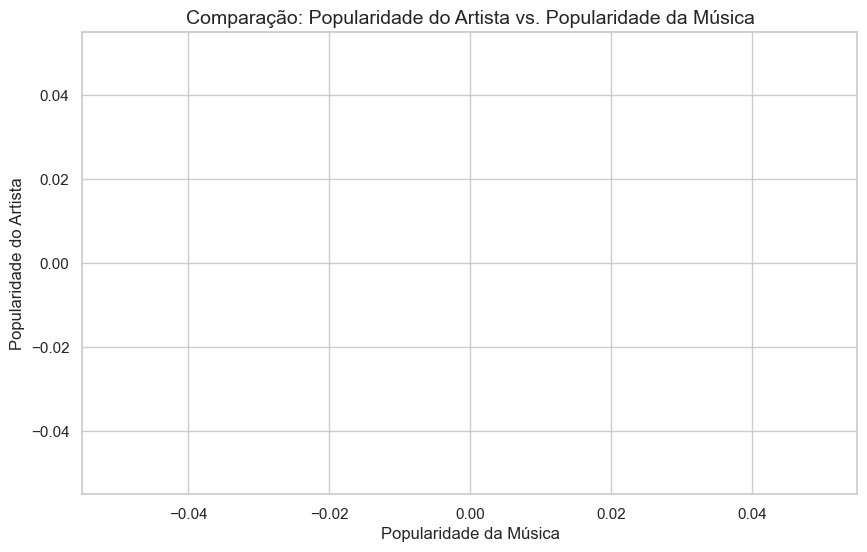

In [150]:


# Criar o gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersão
sns.scatterplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity', 
    alpha=0.4  # Deixa os pontos mais transparentes para destacar a densidade
)

# Adicionar um mapa de densidade (contornos de KDE)
sns.kdeplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity', 
    cmap="Reds",  # Coloração do mapa de densidade
    fill=True,  # Preencher os contornos
    alpha=0.3   # Transparência do preenchimento
)

# Adicionar linha de tendência (regressão linear)
sns.regplot(
    data=df_final, 
    x='popularity', 
    y='artist_popularity',
    scatter=False,  # Apenas a linha, sem adicionar novos pontos
    color='blue', 
    line_kws={"linewidth": 2}
)

# Adicionar títulos e rótulos
plt.title("Comparação: Popularidade do Artista vs. Popularidade da Música", fontsize=14)
plt.xlabel("Popularidade da Música", fontsize=12)
plt.ylabel("Popularidade do Artista", fontsize=12)

# Mostrar o gráfico
plt.show()


COMPARAÇÃO DOS FATORES TRACKS E POPULARIDADE POR GENERO

In [151]:


# Remover valores nulos
df_filtered = df_final.dropna(subset=['genres', 'popularity'])

# Explodir a coluna de gêneros caso contenha múltiplos gêneros em uma única entrada
df_exploded = df_filtered.assign(genres=df_filtered['genres'].str.split(', ')).explode('genres')

# Calcular a popularidade média por gênero
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().reset_index()

# Selecionar os 6 gêneros com maior popularidade média
top_6_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(6)

# Criar heatmaps para os 6 gêneros mais populares
columns_heatmap = ['instrumentalness', 'acousticness', 'danceability', 'energy',
                   'liveness', 'speechiness', 'valence']

for genre in top_6_genres['genres']:
    # Filtrar as músicas do gênero
    df_genre = df_exploded[df_exploded['genres'] == genre].copy()
    
    # Substituir 'popularity' pela média do gênero
    df_genre['popularity'] = df_genre['popularity'].mean()
    
    # Calcular a correlação
    df_corr = df_genre[columns_heatmap + ['popularity']].corr()

    # Criar o heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    # Título do gráfico
    plt.title(f"Correlação entre Características Musicais e Popularidade - {genre}")
    
    # Mostrar o gráfico
    plt.show()


POPULARIDADE DO ALBUM X QUANTIDADE DE TRACKS

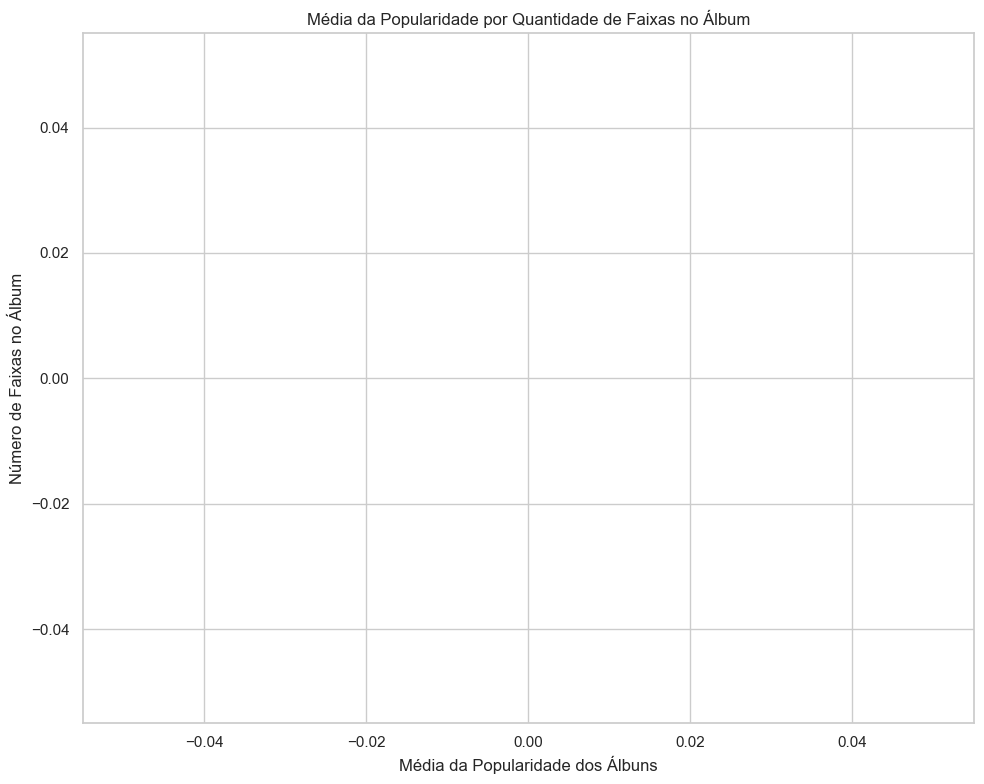

In [152]:


# Calcular a média de popularidade por álbum
df_final['albuns_popularity'] = df_final.groupby('album_id')['popularity'].transform('mean')

# Garantir que cada álbum seja contado apenas uma vez
df_albums_unique = df_final[['album_id', 'total_tracks', 'albuns_popularity']].drop_duplicates(subset=['album_id'])

# Agrupar os álbuns pelo número de faixas e calcular a média da popularidade
df_grouped = df_albums_unique.groupby('total_tracks', as_index=False)['albuns_popularity'].mean()

# Ordenar os valores pelo número de faixas para melhor visualização
df_grouped = df_grouped.sort_values(by='total_tracks', ascending=True)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(df_grouped['total_tracks'], df_grouped['albuns_popularity'], color='skyblue')

# Adicionar rótulos com os valores da popularidade ao lado das barras
for bar, pop in zip(bars, df_grouped['albuns_popularity']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{pop:.1f}', va='center', fontsize=10)

# Configurações do gráfico
ax.set_xlabel("Média da Popularidade dos Álbuns")
ax.set_ylabel("Número de Faixas no Álbum")
ax.set_title("Média da Popularidade por Quantidade de Faixas no Álbum")
plt.tight_layout()

# Exibir o gráfico
plt.show()


Popularidade do álbum vs. Popularidade das músicas

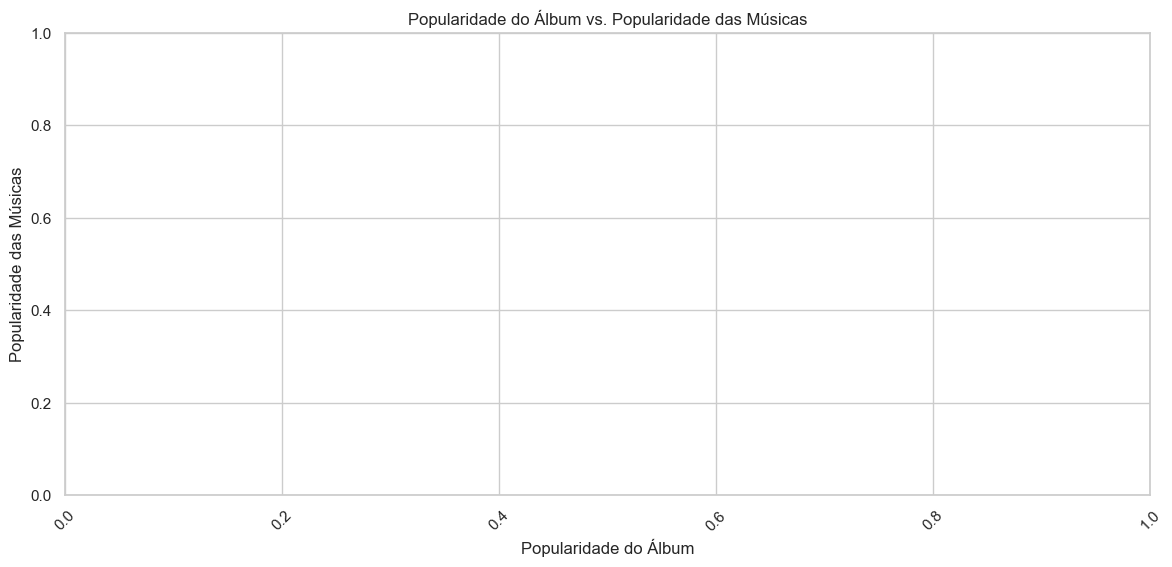

In [153]:


# Criar o gráfico de boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final, x='albuns_popularity', y='popularity', palette='coolwarm')

# Configurações do gráfico
plt.title("Popularidade do Álbum vs. Popularidade das Músicas")
plt.xlabel("Popularidade do Álbum")
plt.ylabel("Popularidade das Músicas")
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização

plt.show()


Popularidade vs. mes e dia de lançamento 

C:\Users\mathe\AppData\Local\Temp\ipykernel_7864\3814825436.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(weekdays_order, rotation=45)  # Rotacionar para melhor visualização


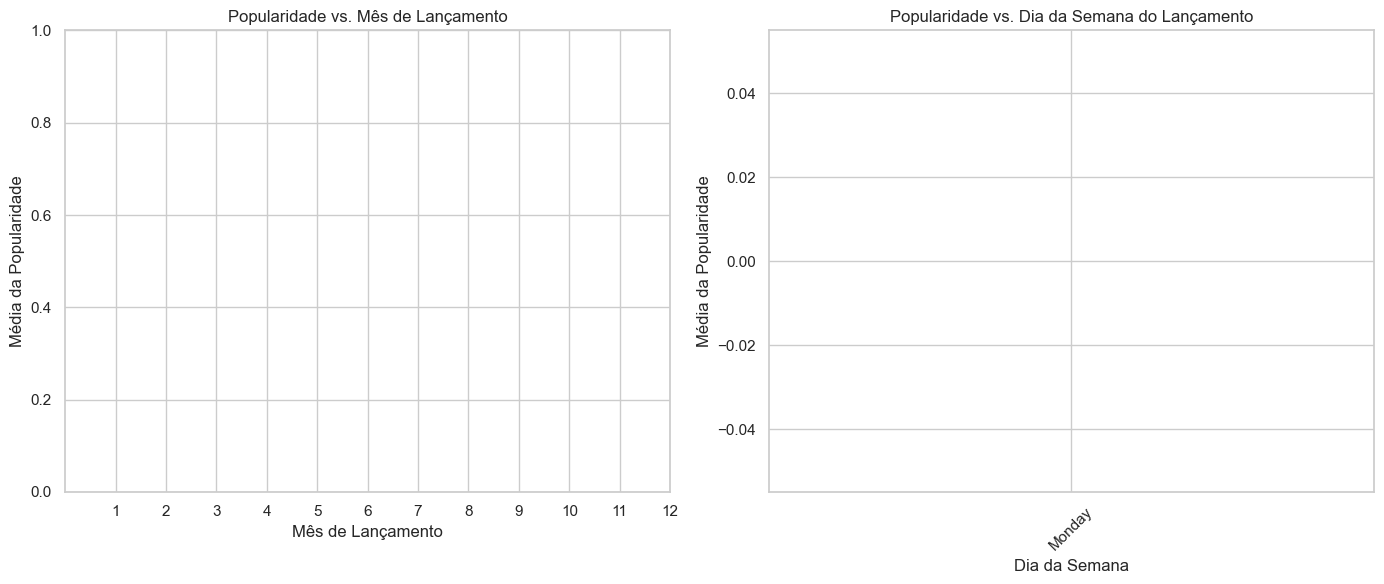

In [154]:


# Converter a data de lançamento para formato datetime
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')

# Extrair mês e dia da semana do lançamento
df_final['release_month'] = df_final['release_date'].dt.month
df_final['release_weekday'] = df_final['release_date'].dt.day_name()  # Nome do dia da semana

# Ordenar os dias da semana corretamente
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Agrupar por mês e calcular a média da popularidade
monthly_popularity = df_final.groupby('release_month')['popularity'].mean()

# Agrupar por dia da semana e calcular a média da popularidade
weekday_popularity = df_final.groupby('release_weekday')['popularity'].mean().reindex(weekdays_order)

# Criar a figura com dois gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Line Plot - Popularidade vs. Mês de Lançamento
sns.lineplot(x=monthly_popularity.index, y=monthly_popularity.values, marker='o', ax=ax[0], color='blue')
ax[0].set_title("Popularidade vs. Mês de Lançamento")
ax[0].set_xlabel("Mês de Lançamento")
ax[0].set_ylabel("Média da Popularidade")
ax[0].set_xticks(range(1, 13))  # Garantir que todos os meses sejam mostrados

# 2️⃣ Line Plot - Popularidade vs. Dia da Semana do Lançamento
sns.lineplot(x=weekday_popularity.index, y=weekday_popularity.values, marker='o', ax=ax[1], color='red')
ax[1].set_title("Popularidade vs. Dia da Semana do Lançamento")
ax[1].set_xlabel("Dia da Semana")
ax[1].set_ylabel("Média da Popularidade")
ax[1].set_xticklabels(weekdays_order, rotation=45)  # Rotacionar para melhor visualização

plt.tight_layout()
plt.show()


In [ ]:
fdfafgfds

Popularidade vs. Duração da Música

In [155]:
df_final.describe(  )

,release_date,total_tracks,artist_popularity,followers,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,...,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence,albuns_popularity,release_month
count,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: Axis limits cannot be NaN or Inf

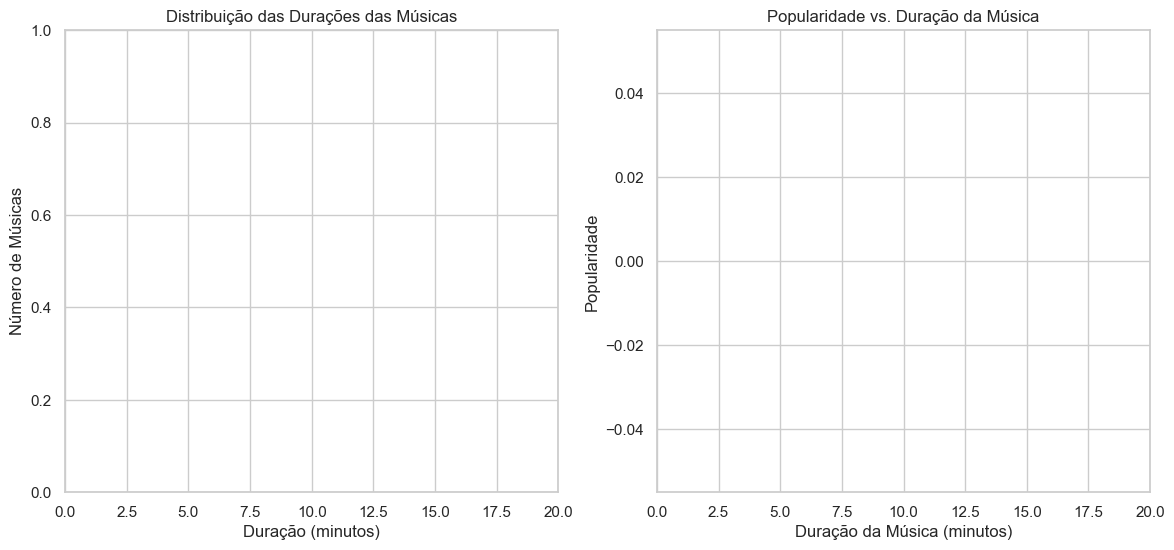

In [156]:


# Converter duração para minutos
df_final['duration_min'] = df_final['duration_ms'] / 60000  

# Filtrar músicas com no máximo 20 minutos
df_filtered = df_final[df_final['duration_min'] <= 20]

# Criar a figura
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Histograma - Distribuição das Durações (até 20 min)
sns.histplot(df_filtered['duration_min'], bins=30, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Distribuição das Durações das Músicas")
ax[0].set_xlabel("Duração (minutos)")
ax[0].set_ylabel("Número de Músicas")
ax[0].set_xlim(0, 20)  # Limitar o eixo X até 20 minutos

# 2️⃣ Scatter Plot - Popularidade vs. Duração (até 20 min)
sns.scatterplot(data=df_filtered, x='duration_min', y='popularity', alpha=0.5, ax=ax[1])
sns.regplot(data=df_filtered, x='duration_min', y='popularity', scatter=False, color='red', ax=ax[1])
ax[1].set_title("Popularidade vs. Duração da Música")
ax[1].set_xlabel("Duração da Música (minutos)")
ax[1].set_ylabel("Popularidade")
ax[1].set_xlim(0, 20)  # Limitar o eixo X até 20 minutos
ax[1].set_ylim(0, df_filtered['popularity'].max())  # Remover valores negativos do eixo Y

plt.tight_layout()
plt.show()


Popularidade Média por Gênero

In [ ]:


# Função para limpar os gêneros, removendo possíveis siglas de países
def limpar_generos(generos):
    stopwords_paises = {'us', 'br', 'uk', 'fr', 'de', 'es', 'it', 'jp', 'cn', 'ru'}  # Adicione mais siglas se necessário
    generos_limp = [g for g in generos if g not in stopwords_paises]
    return generos_limp

# Expandir a lista de gêneros e remover siglas de países
df_exploded = df_final.explode('genres')  # Transforma listas em linhas individuais
df_exploded['genres'] = df_exploded['genres'].apply(lambda x: limpar_generos([x])[0] if isinstance(x, str) else '')

# Calcular popularidade média por gênero
popularidade_por_genero = df_exploded.groupby('genres')['popularity'].mean().reset_index()

# Filtrar apenas gêneros com mais de um caractere (removendo siglas que sobraram)
popularidade_por_genero = popularidade_por_genero[popularidade_por_genero['genres'].str.len() > 2]

# Ordenar do mais popular para o menos popular
popularidade_por_genero = popularidade_por_genero.sort_values(by='popularity', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=popularidade_por_genero.head(15), x='popularity', y='genres', palette='viridis')

# Ajustes visuais
plt.title('Popularidade Média por Gênero (Top 15)')
plt.xlabel('Popularidade Média')
plt.ylabel('Gênero')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()


Músicas Disponíveis em Muitos Mercados São Mais Populares

In [ ]:

# Contar o número de países onde cada música está disponível
df_final['num_countries'] = df_final['available_markets_tck'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='num_countries', y='popularity', alpha=0.5)

# Ajustes visuais
plt.title('Músicas Disponíveis em Muitos Paíse')
plt.xlabel('Número de Países Disponíveis')
plt.ylabel('Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()


Posição na Tracklist e Popularidade

In [ ]:


# Calcular a média de popularidade por posição na tracklist
tracklist_popularity = df_final.groupby('track_number')['popularity'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=tracklist_popularity, x='track_number', y='popularity', marker='o')

# Ajustes visuais
plt.title('Relação entre Posição na Tracklist e Popularidade')
plt.xlabel('Número da Faixa no Álbum')
plt.ylabel('Média de Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()



Álbuns com mais faixas são mais populares?

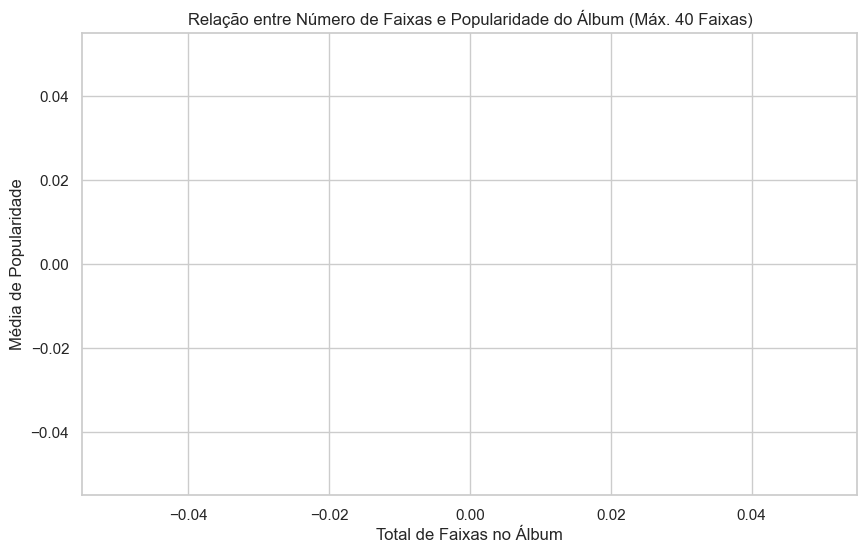

In [ ]:


# Filtrar álbuns com até 40 faixas
album_popularity = df_final.groupby('album_id').agg({'total_tracks': 'first', 'popularity': 'mean'}).reset_index()
album_popularity = album_popularity[album_popularity['total_tracks'] <= 40]

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=album_popularity, x='total_tracks', y='popularity', alpha=0.7)

# Ajustes visuais
plt.title('Relação entre Número de Faixas e Popularidade do Álbum (Máx. 40 Faixas)')
plt.xlabel('Total de Faixas no Álbum')
plt.ylabel('Média de Popularidade')
plt.grid(True)

# Exibir o gráfico
plt.show()



Número de Seguidores do Artista vs. Popularidade da Música

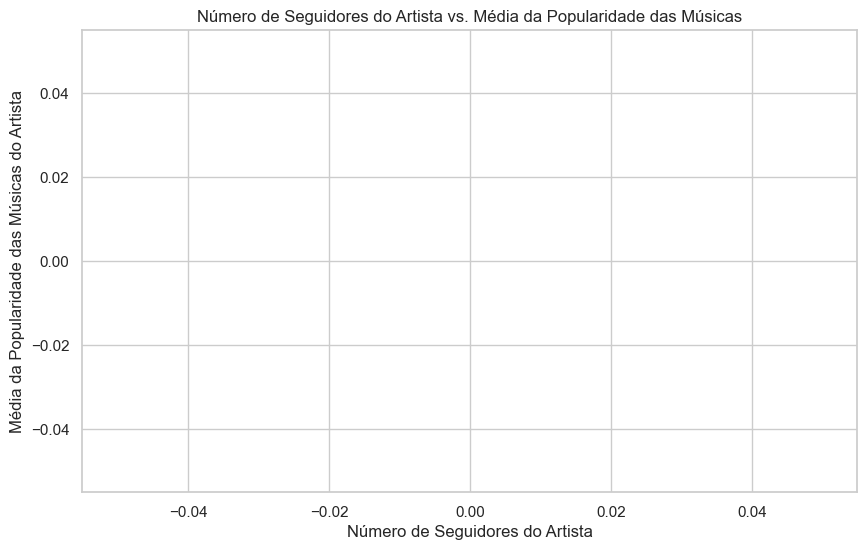

In [ ]:

# Agrupar por artista e calcular a média da popularidade das músicas
df_artist_avg_popularity = df_final.groupby('artist_id', as_index=False).agg({
    'popularity': 'mean',  # Média da popularidade das músicas
    'followers': 'first'   # Pegar o número de seguidores (assumindo que é o mesmo para todas as músicas do artista)
})

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_artist_avg_popularity, x='followers', y='popularity', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel("Número de Seguidores do Artista")
plt.ylabel("Média da Popularidade das Músicas do Artista")
plt.title("Número de Seguidores do Artista vs. Média da Popularidade das Músicas")

# Exibir gráfico
plt.show()

 Comparação de Popularidade entre Artistas Solo e Bandas


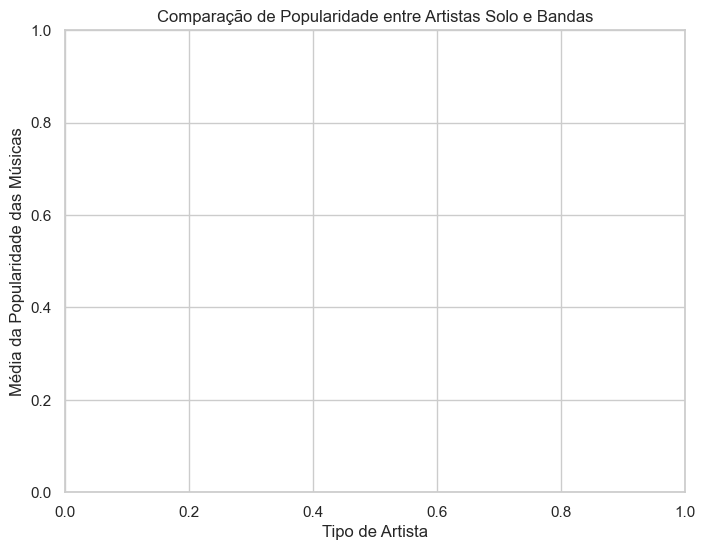

In [ ]:


# Função para classificar artistas como solo ou banda
def classify_artist(artists_id):
    if isinstance(artists_id, str) and ',' in artists_id:  # Se houver múltiplos IDs, é uma banda
        return 'Banda'
    else:
        return 'Solo'

# Criar uma nova coluna para classificar os artistas
df_final['artist_type'] = df_final['artists_id'].apply(classify_artist)

# Calcular a média da popularidade para cada grupo (solo e banda)
avg_popularity = df_final.groupby('artist_type')['popularity'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_popularity, x='artist_type', y='popularity', palette='Set2')

# Adicionando rótulos e título
plt.xlabel("Tipo de Artista")
plt.ylabel("Média da Popularidade das Músicas")
plt.title("Comparação de Popularidade entre Artistas Solo e Bandas")

# Adicionar os valores das médias nas barras
for index, row in avg_popularity.iterrows():
    plt.text(index, row['popularity'], f"{row['popularity']:.2f}", ha='center', va='bottom')

# Exibir gráfico
plt.show()

 Popularidade por Tipo de Álbum (Single, Álbum, Compilation)


ValueError: Axis limits cannot be NaN or Inf

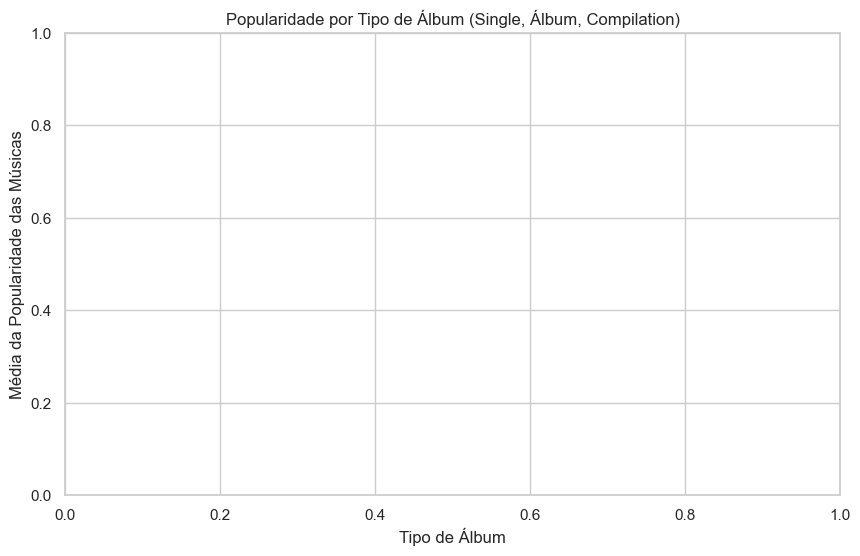

In [ ]:


# Calcular a média da popularidade para cada tipo de álbum
avg_popularity_by_album_type = df_final.groupby('album_type')['popularity'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_popularity_by_album_type, x='album_type', y='popularity', palette='Set2')

# Adicionando rótulos e título
plt.xlabel("Tipo de Álbum")
plt.ylabel("Média da Popularidade das Músicas")
plt.title("Popularidade por Tipo de Álbum (Single, Álbum, Compilation)")

# Adicionar os valores das médias nas barras
for index, row in avg_popularity_by_album_type.iterrows():
    plt.text(index, row['popularity'], f"{row['popularity']:.2f}", ha='center', va='bottom')

# Ajustar a escala do eixo y para melhor visualização
plt.ylim(0, avg_popularity_by_album_type['popularity'].max() + 10)

# Exibir gráfico
plt.show()

PAIS DE ORIGEM DO ARTISTA E POPULARIDADE DO ARTISTA TOP 10

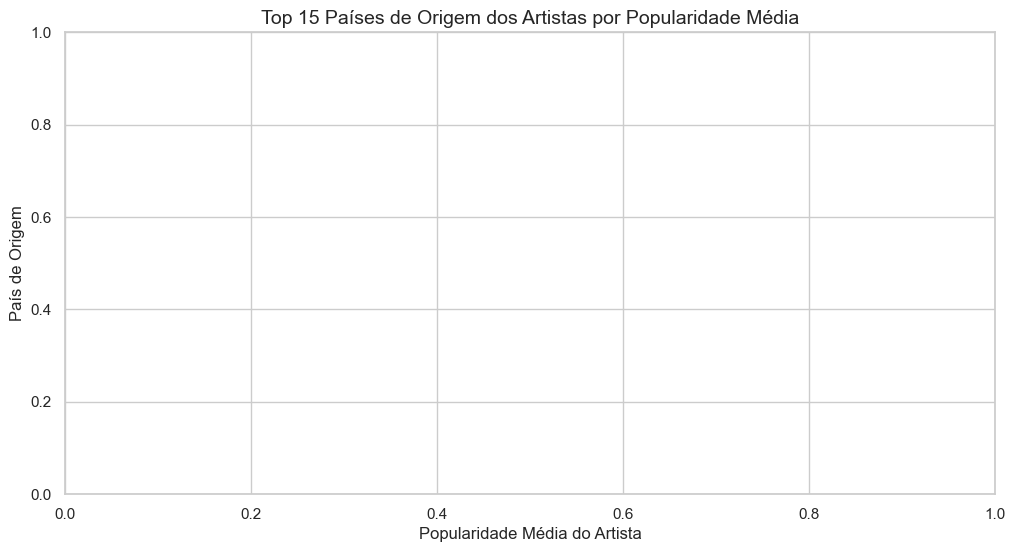

In [ ]:


# Remover valores nulos e garantir que o país tem pelo menos 5 artistas para evitar distorções
df_filtered = df_final.dropna(subset=['country', 'artist_popularity'])

# Contar quantos artistas tem cada país
country_counts = df_filtered['country'].value_counts()

# Manter apenas países com pelo menos 5 artistas (evita viés de países com poucos dados)
valid_countries = country_counts[country_counts >= 5].index
df_filtered = df_filtered[df_filtered['country'].isin(valid_countries)]

# Agrupar por país e calcular a média da popularidade dos artistas
top_countries = df_filtered.groupby('country')['artist_popularity'].mean().reset_index()

# Selecionar os 15 países com a maior média de popularidade
top_countries = top_countries.sort_values(by='artist_popularity', ascending=False).head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries, 
    x='artist_popularity', 
    y='country', 
    palette='coolwarm'
)

# Adicionar títulos e rótulos
plt.title("Top 15 Países de Origem dos Artistas por Popularidade Média", fontsize=14)
plt.xlabel("Popularidade Média do Artista", fontsize=12)
plt.ylabel("País de Origem", fontsize=12)

# Exibir o gráfico
plt.show()


Generos mais populares do brasil

In [ ]:
df_final.columns

Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence', 'albuns_popularity', 'release_month',
       'release_weekday', 'duration_min'],
      dtype='object')

In [ ]:


# 🔍 Filtrar apenas músicas disponíveis no Brasil
df_brasil = df_final[df_final['available_markets_tck'].apply(lambda x: 'BR' in x)]

# 🔍 Explodir a coluna de gêneros (se for uma lista)
df_brasil = df_brasil.explode('genres')

# 🔍 Calcular a média de popularidade por gênero
generos_populares_br = df_brasil.groupby('genres')['popularity'].mean().reset_index()

# 🔍 Selecionar os 10 gêneros mais populares
top_generos_br = generos_populares_br.sort_values(by='popularity', ascending=False).head(10)

# 🔥 Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_generos_br, x='popularity', y='genres', palette='viridis')

# 📌 Personalizar o gráfico
plt.xlabel("Popularidade Média", fontsize=12)
plt.ylabel("Gênero Musical", fontsize=12)
plt.title("🎵 Top 10 Gêneros Musicais Mais Populares no Brasil", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

KeyError: 'genres'

Comparação de Fatores - Faixas vs. Popularidade por Gênero (incompleto) SO PEGAR OS 6 GENEROS MAIS POPULARES DO BRASIL

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


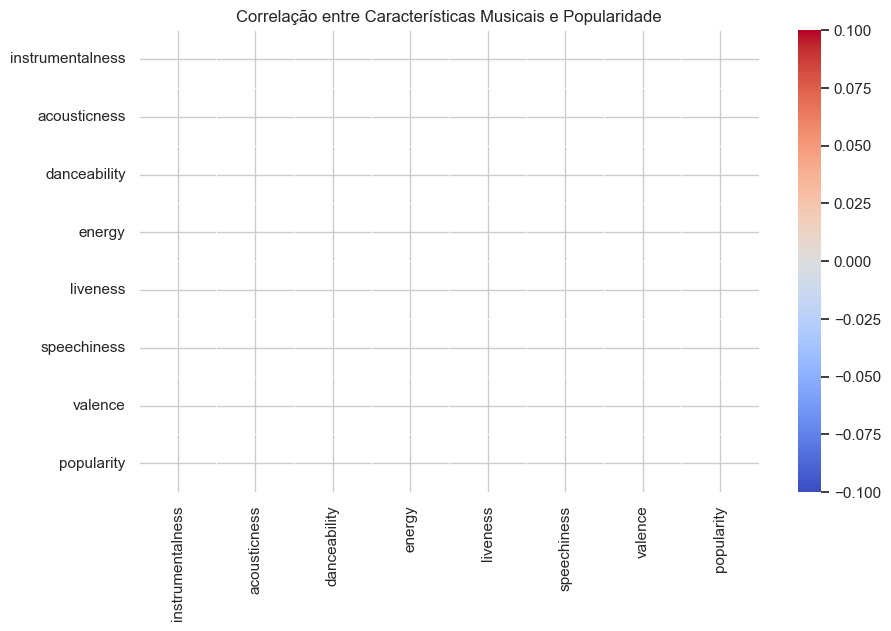

In [ ]:
columns_heatmap = ['instrumentalness', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'popularity']

df_corr = df_final[columns_heatmap].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)


plt.title("Correlação entre Características Musicais e Popularidade")
plt.show()

In [ ]:
print(df_final.columns)


Index(['album_type', 'artist_id', 'available_markets_prev', 'id', 'album_name',
       'release_date', 'total_tracks', 'track_id_alb', 'artist_popularity',
       'followers', 'genres', 'artist_name', 'track_id', 'acousticness',
       'album_id', 'artists_id', 'available_markets_tck', 'country',
       'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'playlist', 'popularity', 'speechiness', 'tempo', 'time_signature',
       'track_number', 'valence', 'albuns_popularity', 'release_month',
       'release_weekday', 'duration_min'],
      dtype='object')


In [ ]:
print("Valores únicos em 'genres':", df_final['genres'].unique())
print("Valores nulos em 'genres':", df_final['genres'].isnull().sum())


Valores únicos em 'genres': []
Valores nulos em 'genres': 0


In [ ]:
df_faixas_popularidade = df_final.groupby(['genres'])[['total_tracks', 'albuns_popularity']].mean().reset_index()
df_faixas_popularidade = df_faixas_popularidade.sort_values(by='albuns_popularity', ascending=False)
display(df_faixas_popularidade.head(10))  # Exibir os 10 primeiros resultados


,genres,total_tracks,albuns_popularity


generos que mais tem musicas

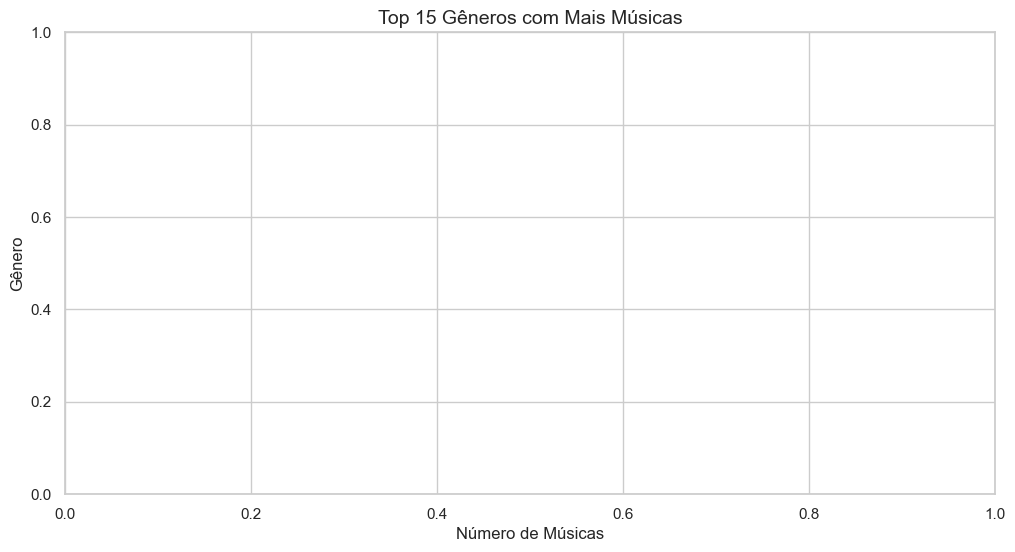

In [157]:


# 🔍 Explodir a coluna de gêneros (caso as músicas tenham múltiplos gêneros)
df_exploded = df_final.explode('genres')

# 🔢 Contar quantas músicas existem por gênero
genero_counts = df_exploded['genres'].value_counts().head(15)  # Top 15 gêneros

# 📊 Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genero_counts.values, y=genero_counts.index, palette="viridis")

# 🔠 Adicionar rótulos
plt.xlabel("Número de Músicas", fontsize=12)
plt.ylabel("Gênero", fontsize=12)
plt.title("Top 15 Gêneros com Mais Músicas", fontsize=14)

# 📈 Exibir gráfico
plt.show()
